In [168]:
import pandas as pd
import numpy as np

In [ ]:
file_path = r"A:\Agri yield prediction\data\crop_production.csv" 
df = pd.read_csv(file_path)

print("✅ Dataset Loaded Successfully!")
print("\nInitial Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nSample Data:\n", df.head())

✅ Dataset Loaded Successfully!

Initial Shape: (246091, 7)

Columns: ['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area', 'Production']

Sample Data:
                     State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0  


In [187]:
unique_crops = df['Crop'].dropna().unique()
unique_crops_sorted = sorted(unique_crops)

In [188]:
unique_crops_sorted

['Apple',
 'Arcanut (Processed)',
 'Arecanut',
 'Arhar/Tur',
 'Ash Gourd',
 'Atcanut (Raw)',
 'Bajra',
 'Banana',
 'Barley',
 'Bean',
 'Beans & Mutter(Vegetable)',
 'Beet Root',
 'Ber',
 'Bhindi',
 'Bitter Gourd',
 'Black pepper',
 'Blackgram',
 'Bottle Gourd',
 'Brinjal',
 'Cabbage',
 'Cardamom',
 'Carrot',
 'Cashewnut',
 'Cashewnut Processed',
 'Cashewnut Raw',
 'Castor seed',
 'Cauliflower',
 'Citrus Fruit',
 'Coconut ',
 'Coffee',
 'Colocosia',
 'Cond-spcs other',
 'Coriander',
 'Cotton(lint)',
 'Cowpea(Lobia)',
 'Cucumber',
 'Drum Stick',
 'Dry chillies',
 'Dry ginger',
 'Garlic',
 'Ginger',
 'Gram',
 'Grapes',
 'Groundnut',
 'Guar seed',
 'Horse-gram',
 'Jack Fruit',
 'Jobster',
 'Jowar',
 'Jute',
 'Jute & mesta',
 'Kapas',
 'Khesari',
 'Korra',
 'Lab-Lab',
 'Lemon',
 'Lentil',
 'Linseed',
 'Litchi',
 'Maize',
 'Mango',
 'Masoor',
 'Mesta',
 'Moong(Green Gram)',
 'Moth',
 'Niger seed',
 'Oilseeds total',
 'Onion',
 'Orange',
 'Other  Rabi pulses',
 'Other Cereals & Millets',
 'Ot

In [170]:
df = df.drop_duplicates()

In [171]:
df.columns = df.columns.str.strip()

In [172]:
df.rename(columns={
    'Crop_Year': 'Year',
    'State_Name': 'State',
    'District_Name': 'District',
    'Crop': 'Crop',
    'Season': 'Season',
    'Area': 'Area',
    'Production': 'Production'
}, inplace=True, errors='ignore')

In [173]:
df['Production'] = df['Production'].replace(0, np.nan)
df['Area'] = df['Area'].replace(0, np.nan)

In [174]:
df['Production'] = df.groupby('Crop')['Production'].transform(lambda x: x.fillna(x.median()))
df['Area'] = df.groupby('Crop')['Area'].transform(lambda x: x.fillna(x.median()))

c:\Users\MANOJ\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\MANOJ\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\MANOJ\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\MANOJ\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\MANOJ\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out,

In [175]:
df = df.dropna(subset=['Production', 'Area', 'Crop'])

print("\n✅ Missing Values Handled Successfully!")


✅ Missing Values Handled Successfully!


In [176]:
df['Yield'] = df['Production'] / df['Area']

In [177]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in ['State', 'District', 'Season', 'Crop']:
    if col in df.columns:
        df[col] = le.fit_transform(df[col].astype(str))

print("\n✅ Categorical Columns Encoded!")


✅ Categorical Columns Encoded!


In [178]:
Q1 = df['Yield'].quantile(0.25)
Q3 = df['Yield'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Yield'] >= Q1 - 1.5 * IQR) & (df['Yield'] <= Q3 + 1.5 * IQR)]

print("\n✅ Outliers Handled!")


✅ Outliers Handled!


In [179]:
print("\nFinal Shape:", df.shape)
print("\nColumns After Processing:", df.columns.tolist())
print("\nSample Data After Cleaning:\n", df.head())



Final Shape: (206155, 8)

Columns After Processing: ['State', 'District', 'Year', 'Season', 'Crop', 'Area', 'Production', 'Yield']

Sample Data After Cleaning:
    State  District  Year  Season  Crop    Area  Production     Yield
0      0       427  2000       1     1  1254.0      2000.0  1.594896
1      0       427  2000       1    65     2.0         1.0  0.500000
2      0       427  2000       1    80   102.0       321.0  3.147059
3      0       427  2000       4     5   176.0       641.0  3.642045
4      0       427  2000       4    18   720.0       165.0  0.229167


In [183]:
output_path = r"A:\Agri yield prediction\data\Crop_Production_Cleaned.csv"
df.to_csv(output_path, index=False)
print(f"\n✅ Cleaned dataset saved successfully at: {output_path}")


✅ Cleaned dataset saved successfully at: A:\Agri yield prediction\data\Crop_Production_Cleaned.csv


In [184]:
unique_crops = df['Crop'].dropna().unique()
unique_crops_sorted = sorted(unique_crops)

In [185]:
unique_crops

array([  1,  65,  80,   5,  18,  33,  90,  92,  93,  11,  32, 104,  98,
        52,  56, 100,   2,  38,  91,   4,  21,  29,  40,  43,  48,  76,
        95,  36, 102,  54,  87,  51,  83, 103,  84,  88,  28,  62,   8,
        23,  64,  66,  96,  89,  30,  49,  78,  53,  58,  13,  85, 101,
        15,  60,  34,  74,  72,  55,   9,  35,  14,  59,  75,  69,  12,
        67,  24,  44,  68,   6,  47,  39,  57,  63,  37,  27,  99,  17,
        79,   0,  19,  20,  16,   3,  82,  10,  31,  41,  71,  94,  25,
        22,  61,  97,  46,  50,   7,  42,  70,  77,  81,  73])

In [190]:
unique_crops = df['Crop'].dropna().unique()
unique_crops_sorted = sorted(unique_crops)

print(f"🌾 Total Unique Crop Varieties Found: {len(unique_crops_sorted)}\n")
for i, crop in enumerate(unique_crops_sorted, start=1):
    print(f"{i}. {crop}")

🌾 Total Unique Crop Varieties Found: 124

1. Apple
2. Arcanut (Processed)
3. Arecanut
4. Arhar/Tur
5. Ash Gourd
6. Atcanut (Raw)
7. Bajra
8. Banana
9. Barley
10. Bean
11. Beans & Mutter(Vegetable)
12. Beet Root
13. Ber
14. Bhindi
15. Bitter Gourd
16. Black pepper
17. Blackgram
18. Bottle Gourd
19. Brinjal
20. Cabbage
21. Cardamom
22. Carrot
23. Cashewnut
24. Cashewnut Processed
25. Cashewnut Raw
26. Castor seed
27. Cauliflower
28. Citrus Fruit
29. Coconut 
30. Coffee
31. Colocosia
32. Cond-spcs other
33. Coriander
34. Cotton(lint)
35. Cowpea(Lobia)
36. Cucumber
37. Drum Stick
38. Dry chillies
39. Dry ginger
40. Garlic
41. Ginger
42. Gram
43. Grapes
44. Groundnut
45. Guar seed
46. Horse-gram
47. Jack Fruit
48. Jobster
49. Jowar
50. Jute
51. Jute & mesta
52. Kapas
53. Khesari
54. Korra
55. Lab-Lab
56. Lemon
57. Lentil
58. Linseed
59. Litchi
60. Maize
61. Mango
62. Masoor
63. Mesta
64. Moong(Green Gram)
65. Moth
66. Niger seed
67. Oilseeds total
68. Onion
69. Orange
70. Other  Rabi pulses

In [191]:
import pandas as pd

crop_rec = pd.read_csv(r"A:\Agri yield prediction\data\Crop_recommendation.csv")
print(crop_rec.info())
print(crop_rec.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [192]:
print(crop_rec.isnull().sum())

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [194]:
crop_rec['label'] = crop_rec['label'].str.lower().str.strip()

In [195]:
crop_rec.drop_duplicates(inplace=True)

In [196]:
print(crop_rec.describe())

                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


In [197]:
crop_rec.rename(columns={'label': 'crop'}, inplace=True)

In [198]:
output_path = r"A:\Agri yield prediction\data\Crop_recommendation_Cleaned.csv"
crop_rec.to_csv(output_path, index=False)
print(f"✅ Cleaned Crop Recommendation dataset saved at: {output_path}")

✅ Cleaned Crop Recommendation dataset saved at: A:\Agri yield prediction\data\Crop_recommendation_Cleaned.csv


In [199]:
crop_prod = pd.read_csv(r"A:\Agri yield prediction\data\Crop_Production_Cleaned.csv")
crop_rec = pd.read_csv(r"A:\Agri yield prediction\data\Crop_recommendation_Cleaned.csv")

In [200]:
crop_prod.rename(columns={'Crop': 'crop'}, inplace=True, errors='ignore')
crop_rec.rename(columns={'label': 'crop'}, inplace=True, errors='ignore')

In [202]:
crop_prod['crop'] = crop_prod['crop'].astype(str).str.lower().str.strip()
crop_rec['crop'] = crop_rec['crop'].astype(str).str.lower().str.strip()

In [206]:
crop_prod['crop']

0           1
1          65
2          80
3           5
4          18
         ... 
206150    102
206151     80
206152     87
206153     80
206154     87
Name: crop, Length: 206155, dtype: object

In [209]:
crop_prod = pd.read_csv(r"A:\Agri yield prediction\data\Crop_Production_Cleaned.csv")
crop_rec = pd.read_csv(r"A:\Agri yield prediction\data\Crop_recommendation_Cleaned.csv")

In [210]:
raw_df = pd.read_csv(r"A:\Agri yield prediction\data\crop_production.csv")

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(raw_df['Crop'].astype(str))

crop_mapping = dict(zip(range(len(encoder.classes_)), encoder.classes_))

crop_prod['crop'] = crop_prod['Crop'].map(crop_mapping)

In [212]:
import re

def clean_crop_name(name):
    name = str(name).lower().strip()
    name = re.sub(r'[^a-z\s]', '', name)  
    name = re.sub(r'\s+', ' ', name)      
    return name

crop_prod['crop'] = crop_prod['crop'].apply(clean_crop_name)
crop_rec['crop'] = crop_rec['crop'].apply(clean_crop_name)

In [213]:
common_crops = set(crop_prod['crop']).intersection(set(crop_rec['crop']))
print(f"✅ Common crops found: {len(common_crops)}")
print("🪴 Example common crops:", list(common_crops)[:15])

✅ Common crops found: 13
🪴 Example common crops: ['apple', 'grapes', 'lentil', 'maize', 'blackgram', 'banana', 'coconut', 'orange', 'mango', 'papaya', 'jute', 'rice', 'coffee']


In [215]:
crop_prod = crop_prod[crop_prod['crop'].isin(common_crops)]
crop_rec = crop_rec[crop_rec['crop'].isin(common_crops)]

In [216]:
env_features = crop_rec.groupby('crop')[['N','P','K','temperature','humidity','ph','rainfall']].mean().reset_index()

In [217]:
merged_df = pd.merge(crop_prod, env_features, on='crop', how='left')

In [218]:
print("\n✅ Final merged dataset shape:", merged_df.shape)
print("\n📊 Columns in merged dataset:\n", merged_df.columns.tolist())
print("\n🔍 Sample data:\n", merged_df.head())


✅ Final merged dataset shape: (22713, 16)

📊 Columns in merged dataset:
 ['State', 'District', 'Year', 'Season', 'Crop', 'Area', 'Production', 'Yield', 'crop', 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

🔍 Sample data:
    State  District  Year  Season  Crop    Area  Production     Yield    crop  \
0      0       427  2010       2    56     1.5        1.10  0.733333  lentil   
1      0       429  2010       2    56  1168.6      556.55  0.476254  lentil   
2      0       559  2010       2    56    29.9       17.85  0.596990  lentil   
3      1        24  1997       1    29  7300.0     9400.00  1.287671  coffee   
4      1        24  1997       1    56  1300.0      500.00  0.384615  lentil   

        N      P      K  temperature   humidity        ph    rainfall  
0   18.77  68.36  19.41    24.509052  64.804785  6.927932   45.680454  
1   18.77  68.36  19.41    24.509052  64.804785  6.927932   45.680454  
2   18.77  68.36  19.41    24.509052  64.804785  6.927932   45.68

In [219]:
output_path = r"A:\Agri yield prediction\data\Crop_Yield_Final.csv"
merged_df.to_csv(output_path, index=False)
print(f"\n💾 Final merged dataset saved successfully at: {output_path}")


💾 Final merged dataset saved successfully at: A:\Agri yield prediction\data\Crop_Yield_Final.csv


In [220]:
merged_df = merged_df.drop(columns=['Crop'])

merged_df = merged_df[['State', 'District', 'Year', 'Season', 'crop', 
                       'Area', 'Production', 'Yield', 
                       'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]

print("✅ Cleaned dataset ready for model training!")
print("🧩 Shape:", merged_df.shape)

✅ Cleaned dataset ready for model training!
🧩 Shape: (22713, 15)


In [221]:
print("🧾 Missing values per column:")
print(merged_df.isnull().sum())

print("\n📈 Statistical summary:")
print(merged_df.describe())

🧾 Missing values per column:
State          0
District       0
Year           0
Season         0
crop           0
Area           0
Production     0
Yield          0
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
dtype: int64

📈 Statistical summary:
              State      District          Year        Season          Area  \
count  22713.000000  22713.000000  22713.000000  22713.000000  2.271300e+04   
mean      17.329679    307.357813   2005.891604      2.330824  1.208627e+04   
std       10.075510    187.190454      4.975349      1.360713  1.061147e+05   
min        0.000000      0.000000   1997.000000      0.000000  1.000000e+00   
25%        9.000000    140.000000   2002.000000      1.000000  4.700000e+01   
50%       17.000000    294.000000   2006.000000      2.000000  2.660000e+02   
75%       27.000000    469.000000   2010.000000      4.000000  2.399000e+03   
max       32.000000    645.000000   2015.000000

In [224]:
# EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

print("✅ Dataset shape:", merged_df.shape)
print("\n📋 Columns:\n", merged_df.columns.tolist())
print("\n🔍 Data types:\n", merged_df.dtypes)


✅ Dataset shape: (22713, 15)

📋 Columns:
 ['State', 'District', 'Year', 'Season', 'crop', 'Area', 'Production', 'Yield', 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

🔍 Data types:
 State            int64
District         int64
Year             int64
Season           int64
crop            object
Area           float64
Production     float64
Yield          float64
N              float64
P              float64
K              float64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
dtype: object


In [225]:
print("\n🧾 Missing values per column:")
print(merged_df.isnull().sum())

print("\n📈 Statistical Summary:")
print(merged_df.describe().T)

print("\n🌾 Unique crops:", merged_df['crop'].nunique())
print("🪴 Crop list:", merged_df['crop'].unique())


🧾 Missing values per column:
State          0
District       0
Year           0
Season         0
crop           0
Area           0
Production     0
Yield          0
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
dtype: int64

📈 Statistical Summary:
               count          mean            std          min          25%  \
State        22713.0     17.329679      10.075510     0.000000     9.000000   
District     22713.0    307.357813     187.190454     0.000000   140.000000   
Year         22713.0   2005.891604       4.975349  1997.000000  2002.000000   
Season       22713.0      2.330824       1.360713     0.000000     1.000000   
Area         22713.0  12086.269870  106114.651238     1.000000    47.000000   
Production   22713.0  16463.557191  110790.032760     0.010000    24.000000   
Yield        22713.0      1.011430       1.146748     0.000514     0.333333   
N            22713.0     43.153325      34.348

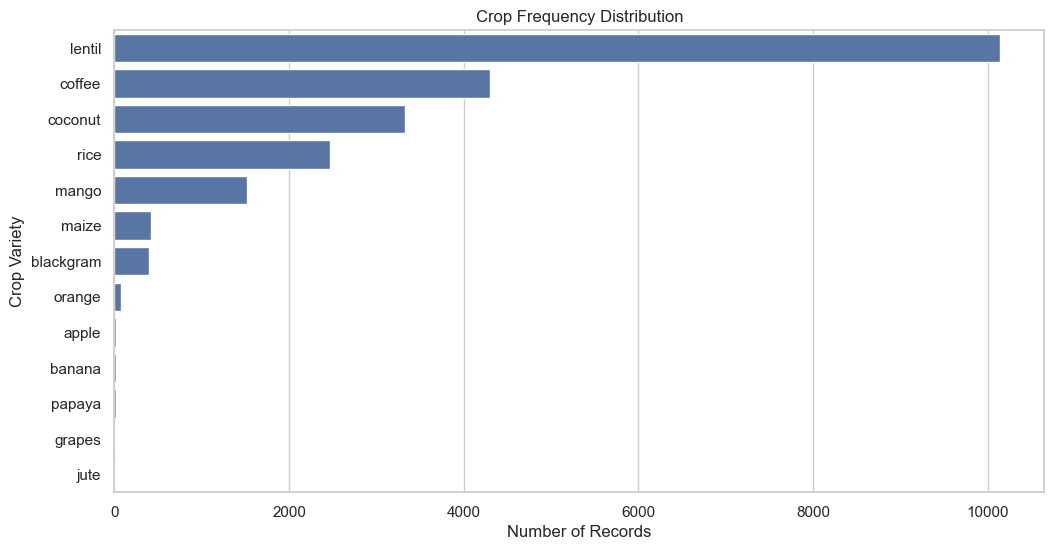

In [226]:
plt.figure(figsize=(12,6))
sns.countplot(y='crop', data=merged_df, order=merged_df['crop'].value_counts().index)
plt.title('Crop Frequency Distribution')
plt.xlabel('Number of Records')
plt.ylabel('Crop Variety')
plt.show()

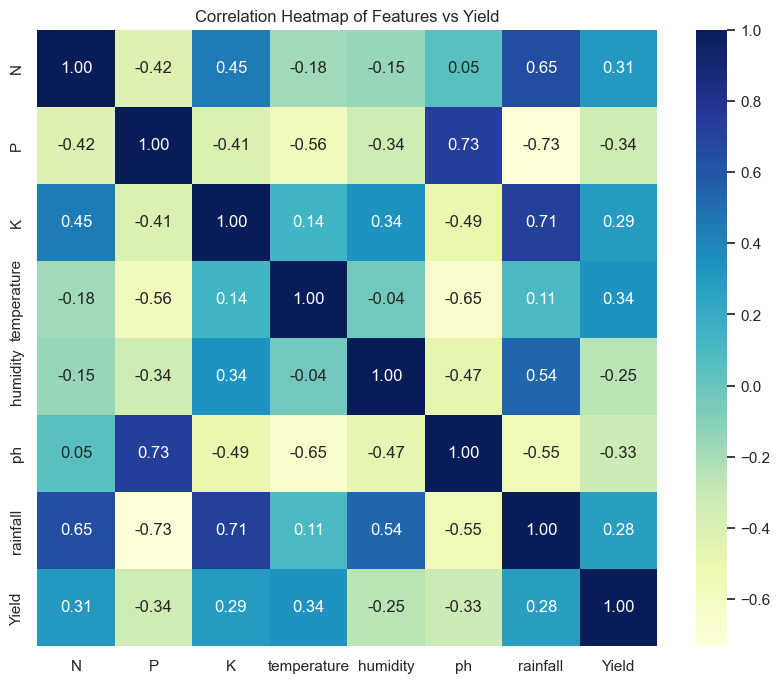

In [227]:
plt.figure(figsize=(10,8))
sns.heatmap(merged_df[['N','P','K','temperature','humidity','ph','rainfall','Yield']].corr(), 
            annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Heatmap of Features vs Yield')
plt.show()

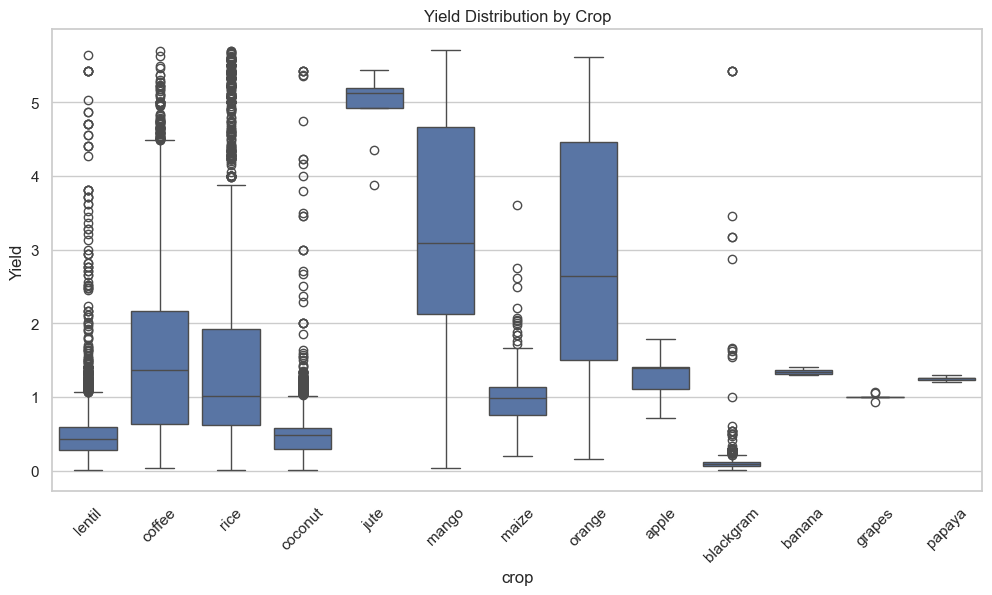

In [228]:
plt.figure(figsize=(12,6))
sns.boxplot(x='crop', y='Yield', data=merged_df)
plt.xticks(rotation=45)
plt.title('Yield Distribution by Crop')
plt.show()

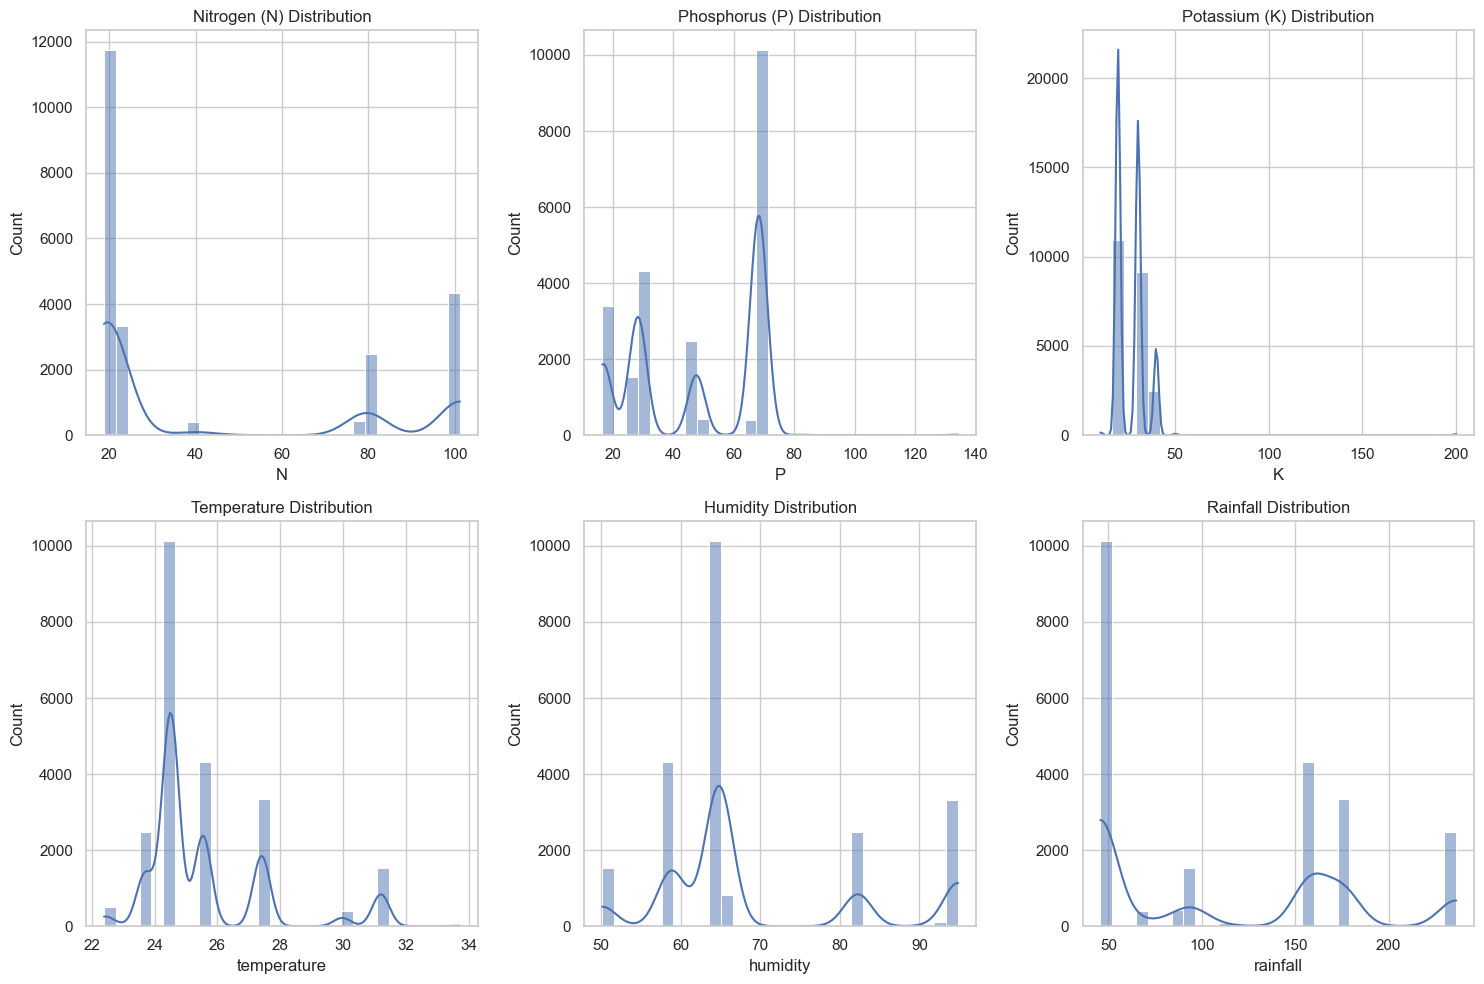

In [229]:
fig, axes = plt.subplots(2, 3, figsize=(15,10))

sns.histplot(merged_df['N'], bins=30, ax=axes[0,0], kde=True)
axes[0,0].set_title('Nitrogen (N) Distribution')

sns.histplot(merged_df['P'], bins=30, ax=axes[0,1], kde=True)
axes[0,1].set_title('Phosphorus (P) Distribution')

sns.histplot(merged_df['K'], bins=30, ax=axes[0,2], kde=True)
axes[0,2].set_title('Potassium (K) Distribution')

sns.histplot(merged_df['temperature'], bins=30, ax=axes[1,0], kde=True)
axes[1,0].set_title('Temperature Distribution')

sns.histplot(merged_df['humidity'], bins=30, ax=axes[1,1], kde=True)
axes[1,1].set_title('Humidity Distribution')

sns.histplot(merged_df['rainfall'], bins=30, ax=axes[1,2], kde=True)
axes[1,2].set_title('Rainfall Distribution')

plt.tight_layout()
plt.show()

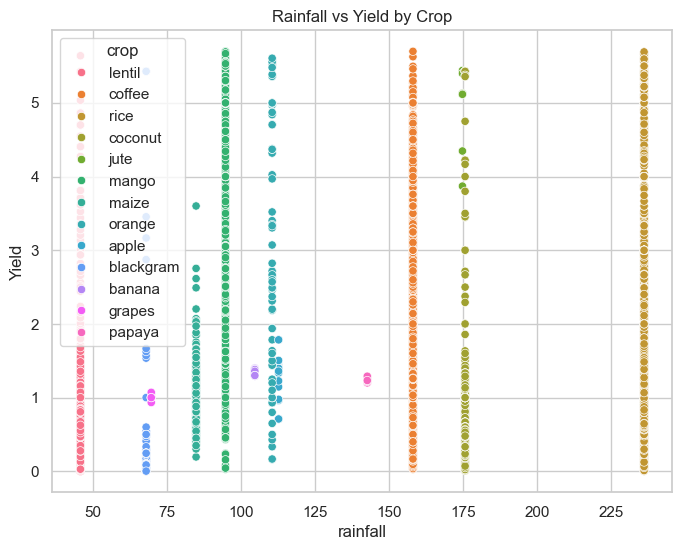

In [230]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='rainfall', y='Yield', hue='crop', data=merged_df)
plt.title('Rainfall vs Yield by Crop')
plt.show()

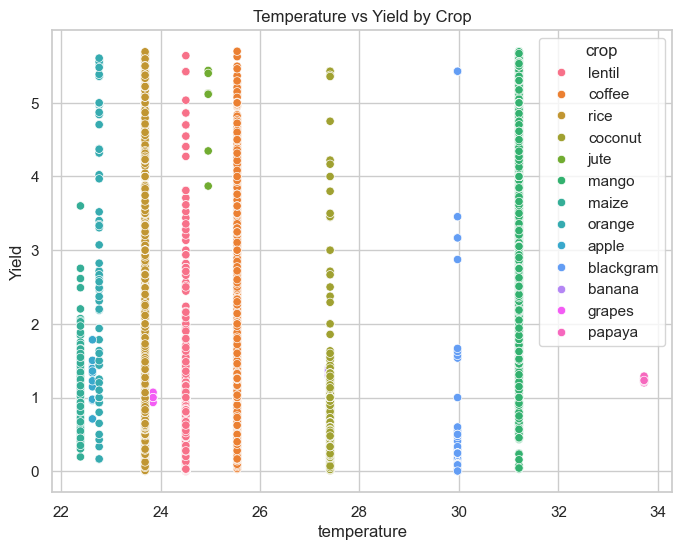

In [231]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='temperature', y='Yield', hue='crop', data=merged_df)
plt.title('Temperature vs Yield by Crop')
plt.show()

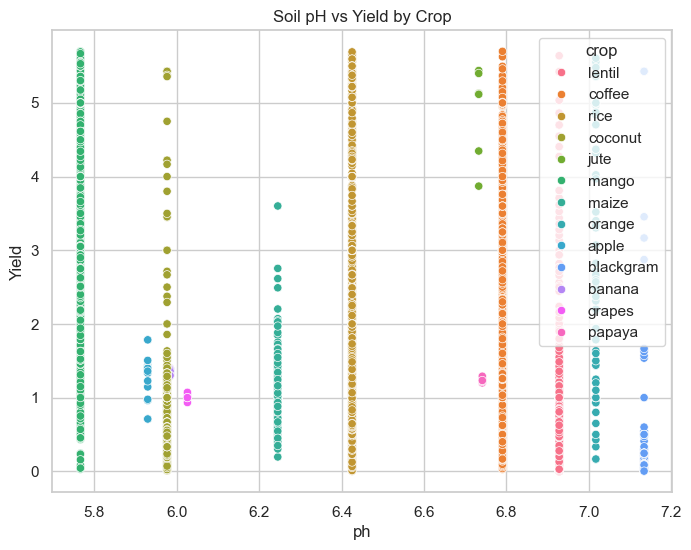

In [232]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='ph', y='Yield', hue='crop', data=merged_df)
plt.title('Soil pH vs Yield by Crop')
plt.show()

C:\Users\MANOJ\AppData\Local\Temp\ipykernel_24792\500314238.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_yield.index, y=avg_yield.values, palette='viridis')


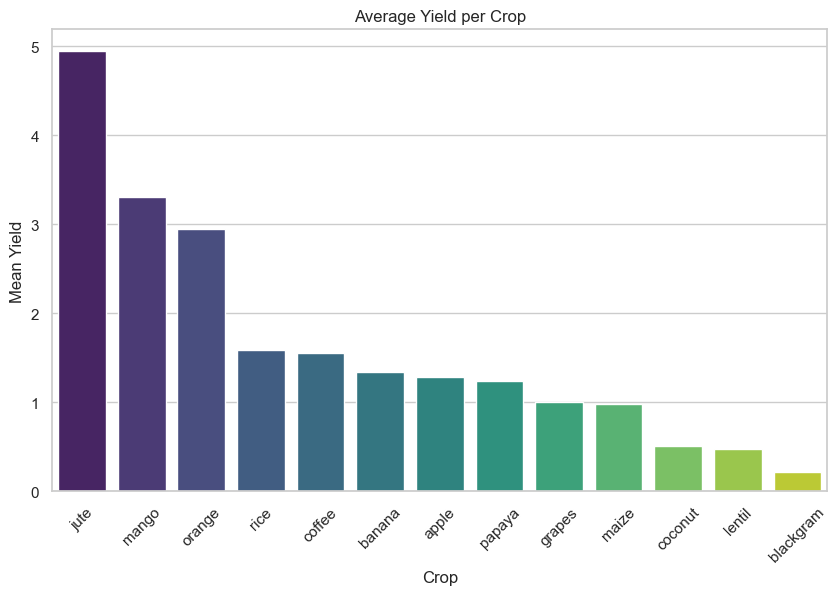

In [233]:
avg_yield = merged_df.groupby('crop')['Yield'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_yield.index, y=avg_yield.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Average Yield per Crop')
plt.ylabel('Mean Yield')
plt.xlabel('Crop')
plt.show()

In [234]:
nutrient_corr = merged_df[['N','P','K','Yield']].corr()['Yield'].sort_values(ascending=False)
print("\n🌾 Correlation of Nutrients with Yield:\n", nutrient_corr)


🌾 Correlation of Nutrients with Yield:
 Yield    1.000000
N        0.306229
K        0.293255
P       -0.339656
Name: Yield, dtype: float64


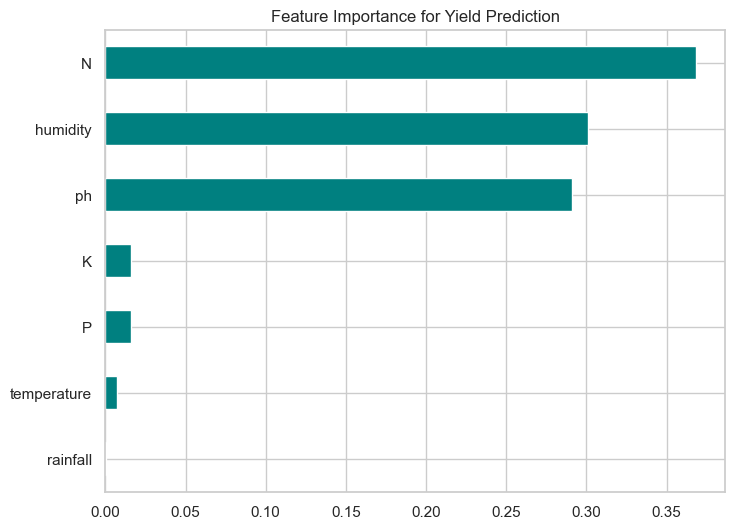

In [235]:
from sklearn.ensemble import RandomForestRegressor

X = merged_df[['N','P','K','temperature','humidity','ph','rainfall']]
y = merged_df['Yield']

rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

feat_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True)

plt.figure(figsize=(8,6))
feat_importances.plot(kind='barh', color='teal')
plt.title('Feature Importance for Yield Prediction')
plt.show()